# <center><i>Classification of differrent varietes of date fuits given several features</i><center>

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import func as f
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

## Step 1: <i>Load the data!<i>

In [2]:
data = pd.read_csv('fruit_data.csv')
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [3]:
print('The dataset has %s rows and %s columns' %(data.shape[0], data.shape[1]))

The dataset has 898 rows and 35 columns


### Acording to the authors [1] the features are grouped into three main features. 

In detail:

In [4]:
print('~~Morphological:')
print()
morphological = list(data.columns[:12])
count = 1
for feat in  morphological:
    print(count, feat)
    count += 1


~~Morphological:

1 AREA
2 PERIMETER
3 MAJOR_AXIS
4 MINOR_AXIS
5 ECCENTRICITY
6 EQDIASQ
7 SOLIDITY
8 CONVEX_AREA
9 EXTENT
10 ASPECT_RATIO
11 ROUNDNESS
12 COMPACTNESS


In [5]:
print('~~Shape:')
print()
count = 1
shape =  list(data.columns[12:16])
for feat in shape:
    print(count, feat)
    count += 1


~~Shape:

1 SHAPEFACTOR_1
2 SHAPEFACTOR_2
3 SHAPEFACTOR_3
4 SHAPEFACTOR_4


In [6]:
print('~~Color:')
print()
count = 1
color = list(data.columns[16:34])
for feat in  color:
    print(count, feat)
    count += 1

~~Color:

1 MeanRR
2 MeanRG
3 MeanRB
4 StdDevRR
5 StdDevRG
6 StdDevRB
7 SkewRR
8 SkewRG
9 SkewRB
10 KurtosisRR
11 KurtosisRG
12 KurtosisRB
13 EntropyRR
14 EntropyRG
15 EntropyRB
16 ALLdaub4RR
17 ALLdaub4RG
18 ALLdaub4RB


### With these features we will try to classify the vareities of dates, namely:

In [7]:
list(data.Class.value_counts().index)

['DOKOL', 'SAFAVI', 'ROTANA', 'DEGLET', 'SOGAY', 'IRAQI', 'BERHI']

## Step 2: <i>Inspect the data!<i>

The first step of data inspection will be to check whether there are any missing values in our dataset!

In [8]:
#2.1 missing data?
print('There are %s data missing!' %(data.isnull().sum().sum() ))
print('Yeayyyy!')

There are 0 data missing!
Yeayyyy!


In [9]:
# 2.2 Multicoliniarity?
print('There are quite a few columns in the dataset, there might be a chance that some of them are related.')
print('In order to check for multicoliniarity we have to plot the corilation matrix.')
print('But since the features are too many to visualaze all together I will plot the correlatation matrix of each group feature (shape, color, and morphology)')

There are quite a few columns in the dataset, there might be a chance that some of them are related.
In order to check for multicoliniarity we have to plot the corilation matrix.
But since the features are too many to visualaze all together I will plot the correlatation matrix of each group feature (shape, color, and morphology)


#### Morphology correlation

In [10]:
c_1 = data[color].corr().abs().values
c_2 = data[shape].corr().abs().values
c_3 = data[morphological].corr().abs().values

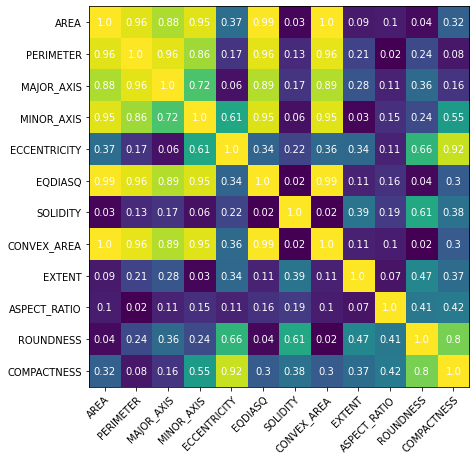

In [11]:
f.heatmap(c_3, morphological, 7, 7)

From the morphological features a will drop: <br>
PERIMETER, <br>
MINOR_AXIS, <br>
EQDIASQ, <br>
CONVEX_AREA <br>
since they are highly corelated (>0.95) with the feature: AREA

In [12]:
cols_to_drop = ['PERIMETER', 'MINOR_AXIS', 'EQDIASQ', 'CONVEX_AREA']

#### Shape correlation

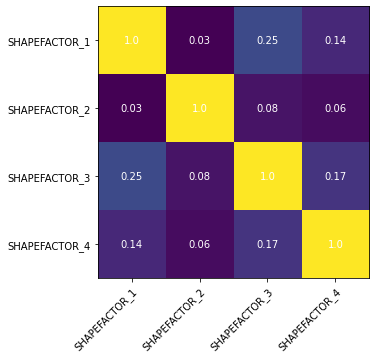

In [13]:
f.heatmap(c_2, shape, 5, 5)

The shape subfeatures does not seem to correlate so I will not drop anything!

#### Color correlation

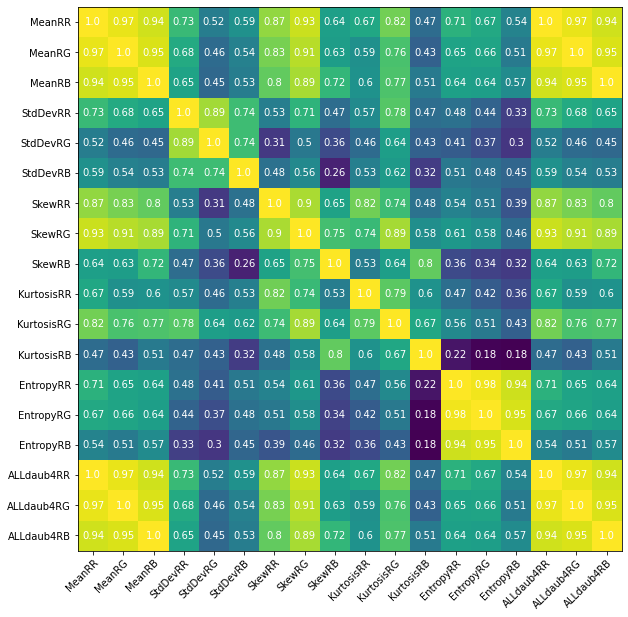

In [14]:
f.heatmap(c_1, color, 10, 10)

From the color subfeatures I will drop: <br>
MeanRG,<br>
MeanRB,<br>
ALLdaub4RR,<br> 
ALLdaub4RG, <br>
EntropyRR, <br>
EntropyRG<br>
since they corelate with each other 

In [15]:
cols_to_drop.extend(['MeanRG', 'MeanRB','ALLdaub4RR','ALLdaub4RG','EntropyRR','EntropyRG'])

In [16]:
data = data.drop(columns = cols_to_drop)

In [17]:
c = data.corr().abs().values
cols = data.columns[:24]

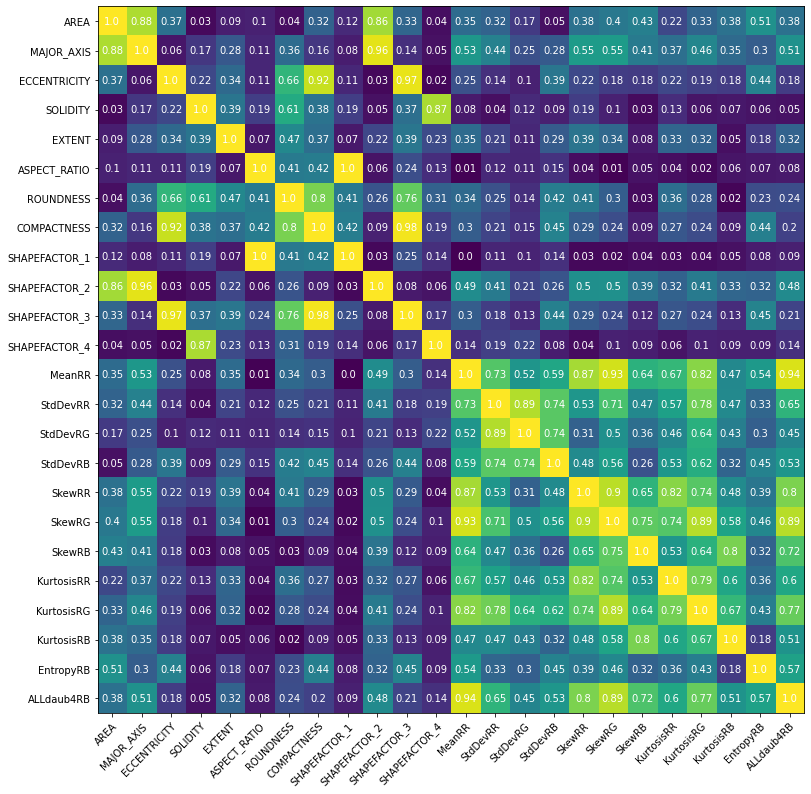

In [18]:
f.heatmap(c, cols, 13, 13)

It seems that we also have to drop: SHAPEFACTOR_1, SHAPEFACTOR_2, SHAPEFACTOR_3

In [19]:
data = data.drop(columns = ['SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3'])
data.head()

,AREA,MAJOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_4,MeanRR,...,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRB,ALLdaub4RB,Class
0,422163,837.8484,0.6373,0.9947,0.7831,1.2976,0.9374,0.8750,0.9936,117.4466,...,30.1230,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-39922372608,47.8400,BERHI
1,338136,723.8198,0.5690,0.9974,0.7795,1.2161,0.9773,0.9065,0.9993,100.0578,...,28.1229,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-31477794816,47.8315,BERHI
2,526843,940.7379,0.6494,0.9962,0.7657,1.3150,0.9446,0.8706,0.9968,130.9558,...,33.9053,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-60311207936,51.9378,BERHI
3,416063,827.9804,0.6266,0.9948,0.7759,1.2831,0.9458,0.8791,0.9915,86.7798,...,30.3955,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-29575010304,41.1882,BERHI
4,347562,763.9877,0.6465,0.9908,0.7569,1.3108,0.9358,0.8707,0.9938,105.5484,...,27.1741,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-25593278464,42.6666,BERHI


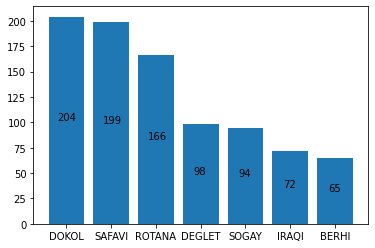

Hmmm... It seems that the dataset is a bit imbalanced!
Maybe we can use oversampling technique (i.e., SMOKE).
Let's see...


In [20]:
variaties = data['Class'].value_counts().index
counts = np.array(data['Class'].value_counts())

plt.bar(variaties, counts)
i =-0.2
for var in counts:
    plt.text(i ,var/2,var)
    i += 1.01
plt.show()
print('Hmmm... It seems that the dataset is a bit imbalanced!')
print('Maybe we can use oversampling technique (i.e., SMOKE).')
print("Let's see...")

## Step 3: <i>Prepare the data!<i>

In [21]:
y = data.Class.map({'DEGLET': 1, 'SAFAVI': 2, 'ROTANA':3, 'IRAQI':4, 'DOKOL':5, 'SOGAY':6, 'BERHI':7})
X = data.iloc[:,:21].values

In [22]:
# Normalize the data
X = f.normalize(X)

## Step 4: <i>Split the data!<i>

In [23]:
# # Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Step 5: <i>Train the models!<i>

In [24]:
labels = [
    'Logistic Regression',
    'Support Vector Machine', 
    'Decision Tree',
    'Naive Bayes',
]

In [25]:
classifiers = [
    LogisticRegression(solver='lbfgs', max_iter=10000,multi_class='ovr'), 
    LinearSVC(multi_class='ovr', max_iter=10000),
    DecisionTreeClassifier(max_depth=7, random_state=42, class_weight = 'balanced'),
    GaussianNB(),  
]

## Step 6: <i>Evaluate the models!<i>

In [26]:
for (model,label) in zip(classifiers, labels):
    model.fit(X_train, y_train)
    print(f'Test accuracy: {model.score(X_test, y_test):.2f} -> {label}')

Test accuracy: 0.88 -> Logistic Regression
Test accuracy: 0.91 -> Support Vector Machine
Test accuracy: 0.82 -> Decision Tree
Test accuracy: 0.85 -> Naive Bayes


In [27]:
print('So the best model is Lostistic Regresion')

So the best model is Lostistic Regresion


### Logistic Regression <h6>A closer look...</h6>

With logistic regression we would like to estimate the probability that a date with a set of particular caracteristics belongs into a specific class. 

In [28]:
LR = LogisticRegression(multi_class="multinomial",solver='lbfgs', max_iter=10000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [29]:
y_pred = LR.predict(X_test)

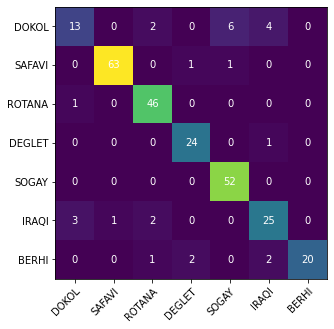

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
f.heatmap(confusion_matrix, variaties)

Even though we can predict the correct clasification with 92% accuracy we still running to some problems when it comes to <i>'DOKOL'</i> variaty. For this class,the 
<br>
<br>
<center>
True possitives are -> 19<br>
False possitives are -> 5<br>
Flase negatives are -> 8<br>
</center>

<b>I can think of two ressons:</b>

1. the <i>'DOKOL'</i> variaty might have the same characterictics as the <i>'ROTANA'</i>, <i>'SOGAY'</i> and <i>'IRAQI'</i> ones therefore making it difficult to dinstiquish them from each other, or 


2. The problem may lay in the imbalanced dataset. Since the <i>'DOKOL'</i> variaty has the most instances in the detaset the model fails to predict accuretly this class.





In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.52      0.62        25
           2       0.98      0.97      0.98        65
           3       0.90      0.98      0.94        47
           4       0.89      0.96      0.92        25
           5       0.88      1.00      0.94        52
           6       0.78      0.81      0.79        31
           7       1.00      0.80      0.89        25

    accuracy                           0.90       270
   macro avg       0.89      0.86      0.87       270
weighted avg       0.90      0.90      0.90       270



0

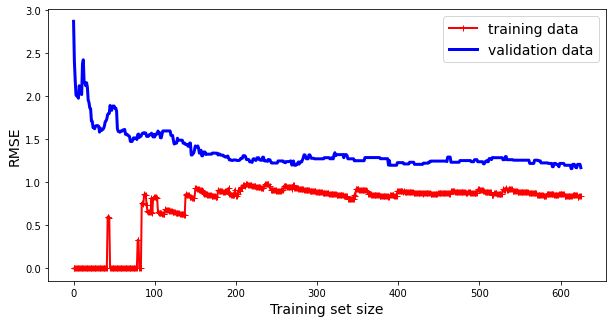

In [32]:
#Learing curve
plt.figure(figsize=(10, 5))
f.plot_learning_curves(LR, X_train, y_train, X_test, y_test)

The learing curve for the logistic regression model is quite good. The model needs around 200 enrties in order to be trained!

### ROC curve

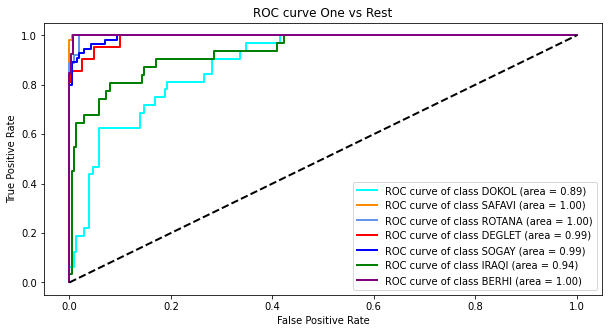

In [33]:
f.ROC_curve(X, y, classifiers[0], variaties)

As we can see from the learning curve we have a hard time correctly predicting <i>'DOKOL'</i> varaiety against the other variaties! Looking at the bright side we successfully predicted each of the rest varaties against the other ones

## Enseble

Now, with the enseble techniques we will try to combine different models in order to improve our model 

The technique that we will use is <i>VotingClassifier</i>. This classifier uses different models to predict the different classes. Since the previously difined models prerform quite the same it makes sense to use this enseble method as it will balance out their individual weaknesses.

In [34]:
VC = VotingClassifier(
     estimators=[('lr', classifiers[0]), ('svc', classifiers[1]), ('dt', classifiers[2]), ('nb', classifiers[3])],
     voting='hard')

classifiers.append(VC)
labels.append('Enseble')

In [35]:
for clf, label in zip(classifiers, labels):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) -> %s" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.02) -> Logistic Regression
Accuracy: 0.90 (+/- 0.02) -> Support Vector Machine
Accuracy: 0.81 (+/- 0.02) -> Decision Tree
Accuracy: 0.86 (+/- 0.01) -> Naive Bayes
Accuracy: 0.91 (+/- 0.02) -> Enseble


Hmmm... it seems that out ensemble method did not give a better result. <br>
Let's try to use an oversampling technique in order to tackle our imbalanced problem

## Oversampling 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

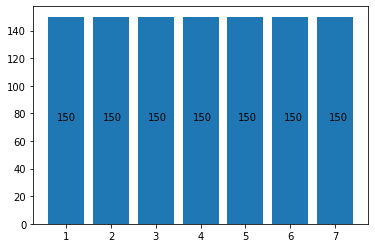

In [38]:
variaties1 = y_train.value_counts().index
counts = np.array(y_train.value_counts())

plt.bar(variaties1, counts)
i =0.8
for var in counts:
    plt.text(i ,var/2,var)
    i += 1.01
plt.show()

In [39]:
for (model,label) in zip(classifiers, labels):
    model.fit(X_train, y_train)
    print(f"Accuracy: {model.score(X_test, y_test):.2f} -> {label}")

Accuracy: 0.88 -> Logistic Regression
Accuracy: 0.90 -> Support Vector Machine
Accuracy: 0.82 -> Decision Tree
Accuracy: 0.88 -> Naive Bayes
Accuracy: 0.90 -> Enseble


Well.. it seems that even with oversampling the accuracy of our model does not impruve that much, meaning that the inbalnced problem is not that critical!!

## Step 7: <i>Present solution!<i>

Overall our data analysis was successfull! We managed to load, inspect and clean the data. We evaluated several models and we came up that logistic regression being the best model (with accuracy of around ~92%)! 

## Referrences:

1. Murat Koklu, Ramazan Kursun, Yavuz Selim Taspinar, Ilkay Cinar, "Classification of Date Fruits into Genetic Varieties Using Image Analysis", Mathematical Problems in Engineering, vol. 2021, Article ID 4793293, 13 pages, 2021. https://doi.org/10.1155/2021/4793293